<a href="https://colab.research.google.com/github/Dkepffl/2022-2-ESAA/blob/main/Assignment/Assignment221111_recommedation1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **CHAPTER 09 추천 시스템**
___


## **01 추천 시스템의 개요와 배경**
___


### | **추천 시스탬의 개요**
- 많은 회사들이 추천 시스템을 통해 사용자의 취향을 이해하고 맞춤 상품과 콘텐츠를 제공해 조금이라도 오래 고객을 머무르게 하기 위하여 전력을 기울이고 있다.
- 하나의 콘텐츠를 선택했을 때 선택된 콘텐츠와 연관된 추천 콘텐츠가 얼마나 사용자의 관심을 끌고 개인에게 맞춘 콘텐츠를 추천했는지는 그 사이트의 평판을 좌우하는 매우 중요한 요소이다.
- 추천 시스템의 진정한 묘미는 사용자 자신도 좋아하는지 몰랐던 취향을 시스템이 발견하고, 그에 맞는 콘텐츠를 추천해주는 것이다. 이러한 경험을 한 사용자는 해당 사이트를 더 강하게 신뢰하여, 더 많은 콘텐츠를 선택한다. 결국 더 많은 데이터가 추천 시스템에 축적되어 추천이 더욱 정확해지는 선순환 시스템이 구축된다.

### | **온라인 스토어의 필수 요소, 추천 시스템**
- 추천 시스템은 특히 온라인에서 그 진가를 발휘한다.
  - 대부분의 전자상거래 업체나 온라인 콘텐츠 제공 업체는 너무 많은 상품으로 가득 차 있다.
  - 한정된 시간이라는 제약 속에서 너무 많은 상품과 콘텐츠는 오히려 사용자가 어떤 상품을 골라야 할지 압박감을 느끼게 만드는데, 추천 시스템은 이런 압박감을 해결해준다.
- 온라인 스토어는 많은 양의 고객과 상품 관련 데이터를 가지고 있다. 이 모든 데이터가 사용자가 흥미를 가질 상품을 추천할 때 사용된다. 예를 들어 아래와 같은 데이터가 사용될 수 있다.
  + 사용자가 어떤 상품을 구매했는가?
  + 사용자가 어떤 상품을 둘러보거나 장바구니에 넣었는가?
  + 사용자가 평가한 영화 평점이나 제품 평가는 어떠한가?
  + 사용자가 스스로 작성한 자신의 취향은?
  + 사용자가 무엇을 클릭했는가?

### | **추천 시스템의 유형**
- 추천 시스템은 크게 **콘텐츠 기반 필터링(Content based filtering)** 방식과 **협업 필터링(Collaborative Filtering)** 방식으로 나뉜다. 그리고 협업 필터링 방식은 다시 **최근접 이웃(Nearest Neighbor)** 협업 필터링과 **잠재 요인(Latent Factor)** 협업 필터링으로 나뉜다.
- 추천 시스템 초창기에는 콘텐스 기반 필터링이나 최근접 이웃 기반 협업 필터링이 주로 사용되었지만, 넷플릭스 추천 시스템 경영 대회에서 행렬 분해 기법을 이용한 잠재 요인 협업 필터링 방식이 우승하면서 대부분의 온라인 스토어에서 잠재 요인 협업 필터링 기반의 추천 시스템을 적용하고 있다.
- 하지만 서비스하는 아이템에 따라 콘텐츠 기반 필터링이나 최근접 이웃 기반 협업 필터링을 유지하는 회사도 많다.
- 요즘에는 개인화 특성을 좀 더 강화하기 위해 콘텐츠 기반과 협업 기반을 적절히 결합해 사용하는 경우도 늘고 있다.

## **02 콘텐츠 기반 필터링 추천 시스템**
___
- 콘텐츠 기반 필터링 방식은 **사용자가 특정한 아이템을 매우 선호하는 경우, 그 아이템과 비슷한 콘텐츠를 가진 다른 아이템을 추천하는 방식**이다.
- 예를 들어 사용자가 특정 영화에 높은 평점을 줬다면, 그 영화의 장르, 출연 배우, 감독, 영화 키워드 등의 콘텐츠와 유사한 다른 영화를 추천해준다.


## **03 최근접 이웃 협업 필터링**
___
- 협업 필터링 방식은 **사용자가 아이템에 매긴 평점 정보나 상품 구매 이력과 같은 사용자 행동 양식(User Behavior)만을 기반으로 추천을 수행하는 것**이다.
- 협업 필터링의 주요 목표는 사용자-아이템 평점 행렬과 같은 축적된 사용자 행동 데이터를 기반으로 **사용자가 아직 평가하지 않은 아이템을 예측 평가(Predicted Rating)**하는 것이다.
- 협업 필터링 기반의 추천 시스템은 최근접 이웃 방식과 잠재 요인 방식으로 나뉘며, 두 방식 모두 사용자-아이템 평점 행렬 데이터만 사용하여 추천을 수행한다.
  + 사용자 평점 행렬에서 행(Row)는 개별 사용자, 열(Column)은 개별 아이템이다.
  + 각 행렬에 해당하는 값은 평점에 해당한다.
  + 레코드 레벨 형태인 사용자-아이템 평점 데이터의 경우, 판다스의 `pivot_table()`과 같은 함수를 이용하여, 행렬 형태로 변경할 수 있다.
- 일반적으로 사용자-아이템 평점 행렬은 많은 아이템을 Column으로 가지는 다차원 행렬이며, 사용자가 아이템에 평점을 매기는 경우가 많지 않아 희소 행렬(Sparse Matrix) 특성을 가지고 있다.
- 최근접 이웃 협업 필터링은 메모리(Memory) 협업 필터링이라고도 하며, 다음과 같이 두 가지로 나눌 수 있다.
  1. **사용자 기반(User-User)** : "당신과 비슷한 고객들이 다음 상품도 구매했습니다.", 특정 사용자와 유사한 다른 사용자를 Top-N으로 선정하여, 이 Top-N 사용자가 좋아하는 아이템을 추천.
  2. **아이템 기반(Item-Item)** : "이 상품을 선택한 다른 고객들은 다음 상품도 구매했습니다.", 사용자들이 그 아이템을 좋아하는지/싫어하는지의 평가 척도가 유사한 아이템을 추천
- 일반적으로 사용자 기반보다는 아이템 기반 협업 필터링이 정확도가 더 높다. 비슷한 상품을 구입한다고 해서 사람들의 취향이 비슷하다고 판단하기는 어렵기 때문이다.
- 추천 시스템의 유사도 측정에는 코사인 유사도를 주로 이용한다.

## **04 잠재 요인 협업 필터링**
___


### | **잠재 요인 협업 필터링의 이해**
- 잠재 요인 협업 필터링은 **사용자-아이템 평점 행렬 속에 숨어 있는 잠재 요인을 추출해 추천 예측을 하는 기법***이다.
  + 행렬을 SVD와 같은 차원 감소 기법으로 분해하여, 잠재 요인을 추출한다. 이러한 기법을  행렬 분해라고 한다.
  + 넷플릭스 경연 대회에서 사용되며 유명해졌다.
- 잠재 요인 협업 필터링은 사용자-아이템 평점 행렬 데이터만을 이용해 말 그대로 '잠재 요인'을 추출하나 그 '잠재 요인'이 어떤 것인지는 명확히 정의할 수 없다.
- 잠재 요인 협업 필터링의 알고리즘 : '잠재 요인'을 기반으로 다차원 희소 행렬인 데이터를 저차원 밀집 행렬(사용자-잠재요인 행렬)과 전치 행렬(잠재요인-아이템 행렬)로 분해할 수 있으며, 이렇게 분해된 두 행렬의 내적을 통해 새로운 예측 사용자-아이템 평점 행렬 데이터를 만들어 사용자가 아직 평점을 부여하지 않는 아이템에 대한 예측 평점을 생성한다. 

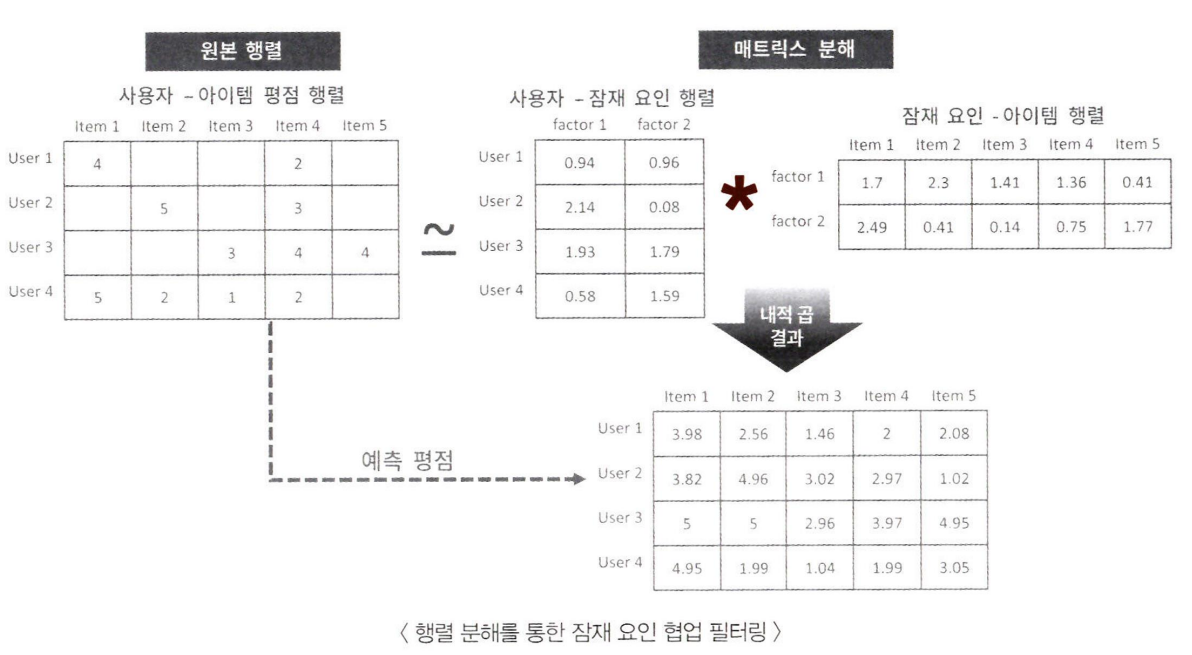

- 이처럼 잠재 요인 협업 필터링은 숨겨져 있는 '잠재 요인'을 기반으로 분해된 행렬을 이용하여, 사용자가 아직 평가하지 않은 아이템에 대한 예측 평가를 수행하는 것이다.
- 행렬 분해에 대해 좀 더 자세히 알아보자.

### | **행렬 분해의 이해**
- 행렬 분해는 다차원의 행렬을 저차원 행렬로 분해하는 기법으로, 대표적으로 SVD, NMF 등이 있다.
- M개의 사용자(User) 행과 N개의 아이템(Item) 열을 가진 행렬 R은행렬 분해를 통해, 사용자-잠재 요인 행렬 P과 잠재 요인-아이템 행렬 $Q^T$로 분해될 수 있다. 이 때 잠재 요인의 개수는 K개이다. 즉, P는 M x K 행렬이고, $Q^T$는 K-N 행렬이다.($R = P \cdot Q^T$)
- R 행렬의 u행 사용자와 i열 아이템 위치에 있는 평점 데이터를 $r_{(u,i)}$라고 한다면,  $r_{(u,i)}=p_u \cdot q^t_i$이다.
  + $p_i$ : P 행려에서 u행 사용자의 벡터
  + $q^t_i$ : Q 해열의 i행 아이템 벡터의 전치 벡터
- 이렇게 R 행렬을 P와 Q 행렬로 분해할 때 주로 SVD(Singular Value Decomposition)을 이용하는데, SVD는 NaN 값이 없는 행렬에만 적용할 수 있다.
  + 그러나 R 행렬은 평점 데이터가 없아, NaN 값이 존재하기 때문에 일반적인 SVD 방식으로 행렬을 분해할 수 없다.
  + 이러한 경우, 확률적 경사 하강법 방식이나 ALS(Alternating Least Squares) 방식을 이용하여 SVD를 수행한다.

### | **확률적 경사 하강법을 이용한 행렬 분해**
- 확률적 경사 하강법을 이용한 행렬 분해 방법은 *P와 Q 행렬로 계산된 예측 R 행렬 값이 실제 R 행렬 값과 가장 ㅊ작은 오류를 가지도록 반복적인 비용 함수 최적화를 통해 P와 Q를 유추**하는 것이다.
- 확률적 경사 하강법(SGD)을 이용행 행렬 분해의 과정은 다음과 같다.
  1. P와 Q를 임의의 행렬로 설정한다.
  2. P와 $Q^T$ 값을 곱하여, 예측 R 행렬을 계산하고, 예측 R 행렬과 실제 R 행렬의 오류 값을 계산한다.
  3. 이 오류 값을 최소화하도록 P와 Q를 업데이트한다.
  4. 오류 값이 목표에 도달할 때까지 반복하며 P와 Q를 업데이트한다.
- 실제 값과 예측 값의 오류 최소화와 L2 규제를 고려한 비용 함수식은 다음과 같다.
$$min \sum (r_{(u,i)}-p_u q^t_i )^2 + \lambda (||q_i||^2 + ||p_u||^2)$$
- 그리고 P와 Q 행렬을 다음과 같이 업데이트할 수 있다.
$$ \hat{p_u} = p_u + \eta (e_{(u,i)} \cdot q_i - \lambda \cdot p_u)$$
$$ \hat{q_u} = p_u + \eta (e_{(u,i)} \cdot p_u - \lambda \cdot q_i)$$
  + $p_u$ : P 행렬의 사용자 u행 벡터
  + $q_i^t$ : Q 행렬의 아이템 i행의 전치 벡터
  + $r_{(u,i)}$ : 실제 R 행렬의 u행, i열에 위치한 값
  + $\hat{r_{(u,i)}}$ : 예측 $\hat{R}$ 행렬의 u행, i열에 위치한 값. $\hat{r_{(u,i)}} = p_u \cdot q_i^t$
  + $e_{(u,i)}$ : 오류 값. $e_{(u,i)}=r_{(u,i)}-\hat{r_{(u,i)}}$
  + $\eta$ : SGD 학습률
  + $\lambda$ : L2 규제 계수
- 이제 SGD를 이용하여 행렬을 분해하는 과정을 파이썬으로 구현해보자.
- 먼저 원본 행렬 R을 NaN 값을 포함하여 생성하고, P와 Q는 정규 분포를 가진 랜덤 값으로 초기화한다. 잠재 요인의 차원은 3으로 설정한다.

In [2]:
import numpy as np

# 원본 행렬 R 생성
R = np.array([[4, np.NaN, np.NaN, 2, np.NaN ],
              [np.NaN, 5, np.NaN, 3, 1 ],
              [np.NaN, np.NaN, 3, 4, 4 ],
              [5, 2, 1, 2, np.NaN ]])
num_users, num_items = R.shape

# 잠재요인 차원 K는 3 설정
K=3

# 분해 행렬 P와 Q 초기화
# P와 Q 행렬의 크기를 지정하고 정규분포를 가진 임의의 값으로 설정 
np.random.seed(1)
P = np.random.normal(scale=1./K, size=(num_users, K))
Q = np.random.normal(scale=1./K, size=(num_items, K))

- 다음으로 실제 R 행렬과 예측 행렬의 오차를 구하는 `get_rmse()` 함수를 만들어보자. 이 행렬은 실제 R 행렬의 NaN 값이 아닌 행렬 값의 위치 인덱스를 추출해 이 인덱스에 있는 실제 R 행렬 값과 분해된 P, Q 행렬을 이용하여 다시 조합된 예측 행렬 값의 RMSE 값을 반환한다.

In [3]:
from sklearn.metrics import mean_squared_error

def get_rmse(R, P, Q, non_zeros):
    error = 0
    # 두개의 분해된 행렬 P와 Q.T의 내적으로 예측 R 행렬 생성
    full_pred_matrix = np.dot(P, Q.T)
    
    # 실제 R 행렬에서 널이 아닌 값의 위치 인덱스 추출하여 실제 R 행렬과 예측 행렬의 RMSE 추출
    x_non_zero_ind = [non_zero[0] for non_zero in non_zeros]
    y_non_zero_ind = [non_zero[1] for non_zero in non_zeros]
    R_non_zeros = R[x_non_zero_ind, y_non_zero_ind]
    full_pred_matrix_non_zeros = full_pred_matrix[x_non_zero_ind, y_non_zero_ind]
      
    mse = mean_squared_error(R_non_zeros, full_pred_matrix_non_zeros)
    rmse = np.sqrt(mse)
    
    return rmse

- 이제 SGD 기반으로 행렬 분해를 수행한다.

In [4]:
# R에서 NaN 값을 제외한 데이터의 행렬 인덱스 추출
non_zeros = [ (i, j, R[i,j]) for i in range(num_users) for j in range(num_items) if R[i,j] > 0 ]

steps=1000 # 업데이트 횟수
learning_rate=0.01 # 학습률
r_lambda=0.01 # L2 규제 계수

# SGD 기법으로 P와 Q 행렬을 업데이트
for step in range(steps):
    for i, j, r in non_zeros:
        # 실제 값과 예측 값의 차이인 오류 값 계산
        eij = r - np.dot(P[i, :], Q[j, :].T)
        # Regularization을 반영한 SGD 업데이트 공식 적용
        P[i,:] = P[i,:] + learning_rate*(eij * Q[j, :] - r_lambda*P[i,:])
        Q[j,:] = Q[j,:] + learning_rate*(eij * P[i, :] - r_lambda*Q[j,:])

    rmse = get_rmse(R, P, Q, non_zeros)
    if (step % 50) == 0 :
        print("### iteration step : ", step," rmse : ", rmse) # 50회마다 오류 값 출력

### iteration step :  0  rmse :  3.2388050277987723
### iteration step :  50  rmse :  0.4876723101369648
### iteration step :  100  rmse :  0.1564340384819247
### iteration step :  150  rmse :  0.07455141311978046
### iteration step :  200  rmse :  0.04325226798579314
### iteration step :  250  rmse :  0.029248328780878973
### iteration step :  300  rmse :  0.022621116143829466
### iteration step :  350  rmse :  0.019493636196525135
### iteration step :  400  rmse :  0.018022719092132704
### iteration step :  450  rmse :  0.01731968595344266
### iteration step :  500  rmse :  0.016973657887570753
### iteration step :  550  rmse :  0.016796804595895633
### iteration step :  600  rmse :  0.01670132290188466
### iteration step :  650  rmse :  0.01664473691247669
### iteration step :  700  rmse :  0.016605910068210026
### iteration step :  750  rmse :  0.016574200475705
### iteration step :  800  rmse :  0.01654431582921597
### iteration step :  850  rmse :  0.01651375177473524
### iterati

- 이제 분해된 P와 Q 행렬로 예측 행렬을 만들어 출력해보자.

In [5]:
pred_matrix = np.dot(P, Q.T)
print('예측 행렬:\n', np.round(pred_matrix, 3))

예측 행렬:
 [[3.991 0.897 1.306 2.002 1.663]
 [6.696 4.978 0.979 2.981 1.003]
 [6.677 0.391 2.987 3.977 3.986]
 [4.968 2.005 1.006 2.017 1.14 ]]
